##### Danylo Vasylyshyn 256711

# Introduction
It's often told that women are bad drivers. The aim of this project is to figure out whether there is any correlation between person's sex and ability to drive and if there is see how it was changing over time.

### Sources of data:
- https://www.fhwa.dot.gov/policyinformation/statistics/2019/dl220.cfm *Licensed Drivers, by Sex and Age Group, 1963 - 2019* <br> This is data taken from the website of the U.S. department of transportation. It contains information about the amount of people with driving licenses in the USA by sex and age group for years 1963 - 2019.

- https://www.iihs.org/topics/fatality-statistics/detail/males-and-females *Passenger vehicle occupant deaths per 100,000 people by sex, 1975-2019* **(This is the third table on the page)** <br> I suppose car accident mortality rate is a reasonable measurement of driving skill, and it is what this table present. Still, the data presented in this set is not conclusive, because mortality rate is taken with respect to the population of the USA, and in order to do derive a proper conclusion about the driving skill, it is necessary to consider the number of male and female drivers. This number is varying and the ratio of male/female drivers was changing over time (*Consider reading appendix in the end of this document to see how the number of men and women with driving licences was changing over time in the USA*).

---

Most of the code was taken from the lectures. Some of it was my own ideas. For the rest I will provide the source.

# Collecting the data
Data i used was in html code, so I did web scraping. Fortunately pandas includes web scraping features, and it was really easy to collect data with read_html function. I found about it here: https://towardsdatascience.com/a-guide-to-scraping-html-tables-with-pandas-and-beautifulsoup-7fc24c331cf7

Both original tables were larger, but i only extracted the data that i will use at one or another point of report.

In [1]:
import pandas as pd

print('Licensed Drivers by Sex 1963 - 2019')

df = pd.read_html("https://www.fhwa.dot.gov/policyinformation/statistics/2019/dl220.cfm")[0].replace('-', 0)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = df.astype(int)
years = df['YEAR']
total_male = df['TOTAL']['MALE'] * 1000
total_female = df['TOTAL']['FEMALE'] * 1000
df = pd.concat([years, total_male, total_female], axis=1)
df.columns = ['Year', 'Male drivers', 'Female drivers']
df.dropna()

Licensed Drivers by Sex 1963 - 2019


,Year,Male drivers,Female drivers
0,1963,56522000,37051000
1,1964,56987000,38481000
2,1966,59478000,41520000
3,1967,60378000,42794000
4,1968,61203000,44207000
5,1969,62347000,45959000
6,1970,63302000,48241000
7,1971,64290000,50135000
8,1972,66027000,52387000
9,1973,67115000,54431000


In [2]:
import requests

print('Passenger vehicle occupant deaths per 100,000 people by sex, 1975-2019 ')
url = 'https://www.iihs.org/topics/fatality-statistics/detail/males-and-females'
r = requests.get(url)
df2 = pd.read_html(r.text)[2]
df2 = df2['Passenger vehicle occupant deaths per 100,000 people by sex, 1975-2019']
df2 = df2[:45] #cutting off the unneeded row
df2 = df2.astype(float)
df2['Year'] = df2['Year'].astype(int)
df2 = pd.concat([df2['Year']['Year'], df2['Male']['Rate'], df2['Female']['Rate'], df2['Male']['Deaths'], df2['Female']['Deaths']], axis=1)
df2.columns = ['Year', 'Male death rate', 'Female death rate', 'Male deaths', 'Female deaths']
df2.dropna()

Passenger vehicle occupant deaths per 100,000 people by sex, 1975-2019 


,Year,Male death rate,Female death rate,Male deaths,Female deaths
0,1975,20.7,7.9,21841.0,8755.0
1,1976,21.0,8.4,22300.0,9420.0
2,1977,21.2,8.9,22806.0,10015.0
3,1978,22.5,9.2,24443.0,10477.0
4,1979,22.6,8.9,24772.0,10252.0
5,1980,22.3,8.9,24649.0,10342.0
6,1981,21.2,8.5,23667.0,10038.0
7,1982,18.2,7.7,20496.0,9158.0
8,1983,17.4,7.8,19720.0,9430.0
9,1984,17.5,8.2,20103.0,9991.0


# Presenting the data
in this part i want to visualize the collected data for the reader to better grasp the trends in it.

---

Down below I have plotted the data of my own calculations and combined it with the data already available in the dataset from the website. Both data represent the mortality rate of men and women in the car accidents. Difference between them is that I defined mortality rate as proportion between *men/women with  driving license in given year* and *number of car accident deaths in given year*, whereas in the dataset on the website mortality rate is defined as proportion between *population of USA in given year* and *number of car accident deaths in given year*.<p>
In order to scale the data given on the website and "map" it onto my graph I multiplied it by scalar. In this case scaling the data doesn't have impact on it's usability, because what we want to observe is the ratio between male and female mortality, which is preserved.

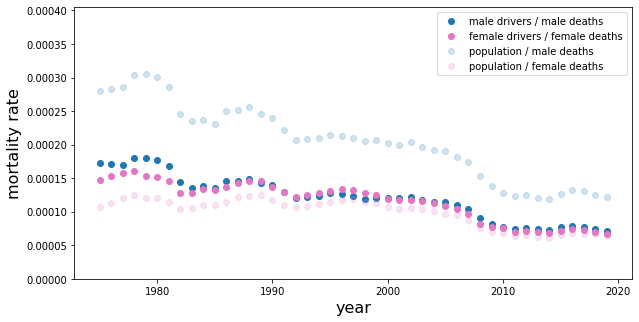

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#calculating the proporting between men/women with  driving license in given year 
#and 
#number of car accident deaths in given year
x = df['Year'].values[11:]
y = df2['Female deaths']/df['Female drivers'].values[11:]
z = (df2['Male deaths']/df['Male drivers'].values[11:]) / 1.8

#deriving a scalar mentioned in description
proportion = 1/2*(z[0]/df2['Male death rate'][0] + y[0]/df2['Female death rate'][0])

plt.figure(figsize=(10, 5))

#plotting my calculated data
plt.scatter(x, z, label='male drivers / male deaths', color='tab:blue')
plt.scatter(x, y, label='female drivers / female deaths', color='tab:pink')

#plotting data from the website
plt.scatter(x, df2['Male death rate'] * proportion, label='population / male deaths', color='tab:blue', alpha=0.2)
plt.scatter(x, df2['Female death rate'] * proportion, label='population / female deaths', color='tab:pink', alpha=0.2)

plt.xlabel('year', fontsize=16)
plt.ylabel('mortality rate', fontsize=16)
plt.ylim(0, (df2['Male death rate'].max() * proportion) + 0.0001)
plt.legend(loc='best')
plt.show()

>I should admit that the pattern and the rate of change in both datasets are quite similar. However the ratio between male and female drivers mortality is the subject of our attention, and it differs for the data i extracted and data from the website.

# Data analysis
---

## Sources of information
For this part i've been collecting some information.
- Video tutorials i've gone through:<br>https://www.youtube.com/watch?v=D9y6dcy0xK8 <br> https://www.youtube.com/watch?v=e8Yw4alG16Q&t=3s<br>
- Articles:<br> https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/<br>
- Code sources: <br> https://colab.research.google.com/drive/1Z-35uZpDfwVcPXlY-BrdvdnYczAbDkXI#scrollTo=7Ga2K0loZGlm (Most of my code was referenced from here. Link for it was in the first video tutorial description) <br> https://stackoverflow.com/questions/64277905/statsmodels-arima-how-to-get-confidence-prediction-interval (code for confidence intervals)<br>
- Documentation of statsmodel library: <br>https://www.statsmodels.org/stable/index.html<br>
- Notes from https://byes.pl/
---

## Analysing autocorrelation graphs

Female drivers mortality autocorrelation graph


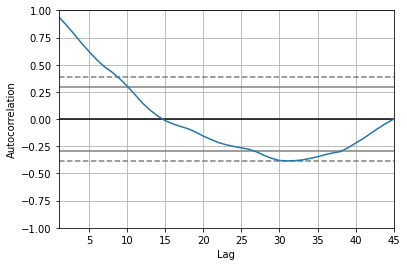

Male drivers 1st order differencing


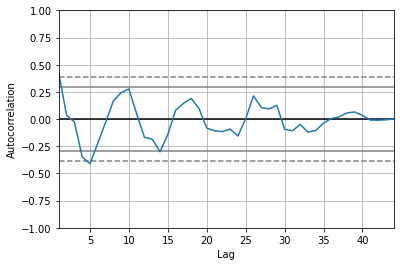

Male drivers 2nd order differencing


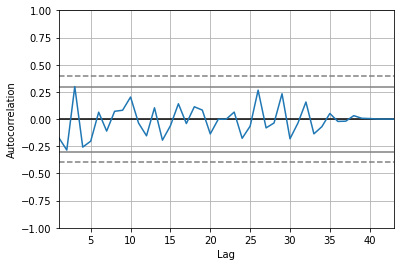

Female drivers mortality autocorrelation graph


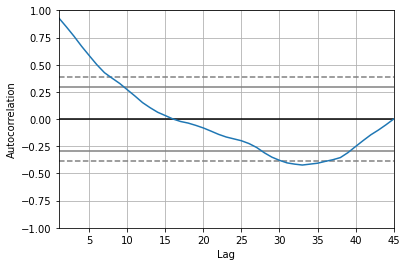

Female drivers 1st order differencing


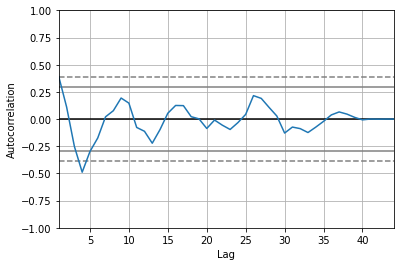

Female drivers 2nd order differencing


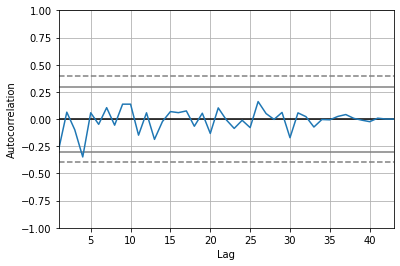

In [4]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
print('Female drivers mortality autocorrelation graph')
autocorrelation_plot(y)
pyplot.show()

print('Male drivers 1st order differencing')
autocorrelation_plot(y.diff().dropna())
pyplot.show()

print('Male drivers 2nd order differencing')
autocorrelation_plot(y.diff().diff().dropna())
pyplot.show()

print('Female drivers mortality autocorrelation graph')
autocorrelation_plot(z)
pyplot.show()

print('Female drivers 1st order differencing')
autocorrelation_plot(z.diff().dropna())
pyplot.show()

print('Female drivers 2nd order differencing')
autocorrelation_plot(z.diff().diff().dropna())
pyplot.show()

We can see that the autocorrelation is positive till 15th lag. This information is going to be used for determining the best p (AR - auto regressive) parameter for the ARIMA model used.
<p> I have also sketched differencing graphs, from which we can determine the candidate for d parameter (I - integrated) part of the model. It's in russian, but from  (<b><a href='https://www.machinelearningmastery.ru/arima-forecasting-in-python-90d36c2246d3/'>here</a></b>) I've read that a good candidate for the p parameter is where the lags dont leave the significance level, in our case it's second order differencing.


---
## Finding best coeffitients for ARIMA model
This part can take some time in order to iterate through many possible values of parameters <b>(for me it usually took around a minute)</b>.<p>
- Choice for the range of values of parameter p (Auto regressive) is explained by the autocorellation graph plotted above. Because autocorrelation of lags is positive up to 15th lag, meaning each successive value depend on ~15 previous values. It would also be naive to consider little values of p because the dataset has noise, and such a low depth of auto regression can be resulted in noise (deviation) being considered by a model to make further predictions.
- Choice of d is explained by the data collected from the differencing graphs above. Additionally I have tested different types of d parameters, but the smallest error was always with parameter of 2.
- For the moving average part (q parameter) i decided on a range (0 to 5) from my previous observations (even if i did it larger it took more time to go through all possibilities but the best result usually was between ~1 - 4)

<p> Here I split the dataset on train and test part (2/3 for train and 1/3 for test by convention) in order to evaluate the quality of predictions</p> 

In [5]:
import itertools
import warnings
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

#possible coeffitients
p=range(5, 15)
d=range(2, 3)
q=range(0, 5)

pdq = list(itertools.product(p,d,q))
pdq
smallest_error1 = ((0, 0, 0), 10) #10 because numbers from my dataset are very small so it's safe to say 10 is a large error
smallest_error2 = ((0, 0, 0), 10)
warnings.filterwarnings('ignore')



for param in pdq:
    try:
        #model for male drivers
        train = z[:30]
        test = z[30:].reset_index(drop=True)
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        result = model_arima_fit.get_forecast(15)
        predictions = result.predicted_mean
        print(f"{param} {mean_squared_error(test,predictions)}")
        if(mean_squared_error(test,predictions) < smallest_error1[1]):
            smallest_error1 = (param, mean_squared_error(test,predictions))
    except:
        continue
    try:
        #model for female drivers
        train = y[:30]
        test = y[30:].reset_index(drop=True)
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        result = model_arima_fit.get_forecast(15)
        predictions = result.predicted_mean
        print(f"{param} {mean_squared_error(test,predictions)}")
        if(mean_squared_error(test,predictions) < smallest_error2[1]):
            smallest_error2 = (param, mean_squared_error(test,predictions))
    except:
        continue

print(f"Smallest error for male was exhibited by ARIMA model with params : p = {smallest_error1[0][0]}, d = {smallest_error1[0][1]}, q = {smallest_error1[0][2]} with mean squared error {smallest_error1[1]}")
print(f"Smallest error for female was exhibited by ARIMA model with params : p = {smallest_error2[0][0]}, d = {smallest_error2[0][1]}, q = {smallest_error2[0][2]} with mean squared error {smallest_error2[1]}")

(5, 2, 0) 2.2606519337980557e-10
(5, 2, 0) 3.16672290245366e-10
(5, 2, 1) 4.2734171779012723e-10
(5, 2, 1) 3.605047520763839e-10
(5, 2, 2) 1.0409175795964193e-10
(5, 2, 2) 7.078567912945448e-10
(5, 2, 3) 1.4163660135144556e-10
(5, 2, 3) 8.042528763078642e-10
(5, 2, 4) 1.702318974188312e-10
(5, 2, 4) 1.7486086024117713e-10
(6, 2, 0) 1.2910384511427988e-10
(6, 2, 0) 1.0759840651184688e-10
(6, 2, 1) 3.139484449678258e-10
(6, 2, 1) 2.160052093813188e-10
(6, 2, 2) 1.6121407989948192e-10
(6, 2, 2) 3.681384619844092e-10
(6, 2, 3) 3.7302584608268347e-10
(6, 2, 3) 4.369088786386188e-10
(6, 2, 4) 2.1108319084856168e-10
(6, 2, 4) 1.7422524922575345e-10
(7, 2, 0) 3.487607974423137e-10
(7, 2, 0) 1.075666012662225e-10
(7, 2, 1) 3.3696656222740787e-10
(7, 2, 1) 1.9349487546513345e-10
(7, 2, 2) 1.1617472580749537e-10
(7, 2, 2) 2.408169497437862e-10
(7, 2, 3) 1.0070536527822328e-10
(7, 2, 3) 1.8039310620033185e-10
(7, 2, 4) 2.1108319084856168e-10
(7, 2, 4) 1.7422524922598827e-10
(8, 2, 0) 2.67224169577

>Results of the search can be seen on the very end of the output.

---
## Presenting analysis
Here I use the whole dataset as a training set to make predictions about future data.

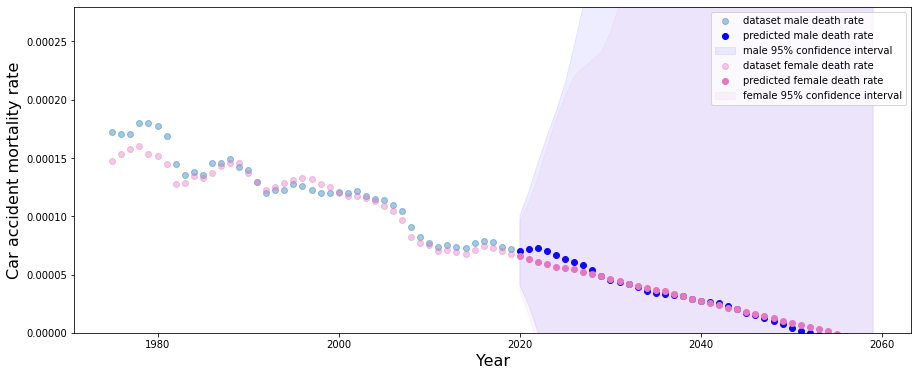

In [6]:
#for plotting later on it's necessary to change x axis into years
year_shift = 1975 #because the collected data starts from 1975


#model for male dirvers
train = z[:45]

model_arima1 = ARIMA(train, order=smallest_error1[0]) #best values of parameters found previously
model_arima_fit1 = model_arima1.fit()

result1 = model_arima_fit1.get_forecast(40)
predictions1 = result1.predicted_mean    #predicting values
conf_int1 = result1.conf_int(alpha=0.05) #calculating confidence interval

plt.figure(figsize=(15, 6))
plt.ylim(0, max(z) + 0.0001)
plt.scatter(range(0 + year_shift, len(train) + year_shift), train, color='tab:blue', alpha=0.4, label='dataset male death rate')
plt.scatter(range(len(train) + year_shift, len(train) + len(predictions1) + year_shift), predictions1,color='blue', label='predicted male death rate')
plt.fill_between(range(len(train) + year_shift, len(train) + len(predictions1) + year_shift), conf_int1['lower Male deaths'], conf_int1['upper Male deaths'], color='b', alpha=.07, label='male 95% confidence interval')


#model for female drivers
train = y[:45]

model_arima2 = ARIMA(train,order=smallest_error2[0]) #best values of parameters found previously
model_arima_fit2 = model_arima2.fit()

result2 = model_arima_fit2.get_forecast(40)
predictions2 = result2.predicted_mean    #predicting values
conf_int2 = result2.conf_int(alpha=0.05) #calculating confidence interval

plt.scatter(range(0 + year_shift, len(train) + year_shift), train, color='tab:pink', alpha=0.4, label='dataset female death rate')
plt.scatter(range(len(train) + year_shift, len(train) + len(predictions1) + year_shift), predictions2, color='tab:pink', label='predicted female death rate')
plt.fill_between(range(len(train) + year_shift, len(train) + len(predictions2) + year_shift), conf_int2['lower Female deaths'], conf_int2['upper Female deaths'], color='tab:pink', alpha=.07, label='female 95% confidence interval')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Car accident mortality rate', fontsize=16)
plt.legend()
plt.show()

> The fact that te forecasted data is similar to a straight line is a good sign, meaning that the model 'distinguished' the unpredictable noise previously present in the dataset. 

# Conclusion
---
What can we conclude from the given models:
- There is no substantial difference between the driving skills of male and female drivers
- The general trend is the stable decrease of the mortality rate of drivers in accidents. It is probably attributed to increase in safety technologies, but also possibly increase in driving education quality and the advancement of driving techniques;

# Appendix
---

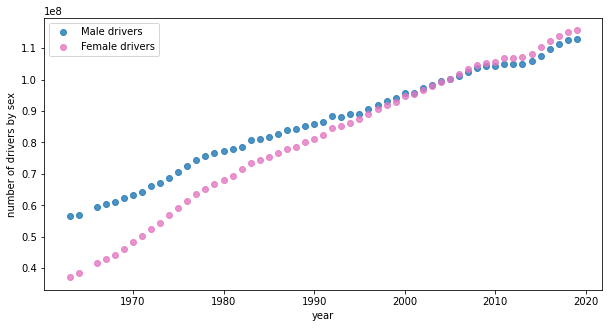

In [7]:
year = df['Year']
male = df['Male drivers']
female = df['Female drivers']

plt.figure(figsize=(10, 5))
plt.scatter(year, male, label='Male drivers', color='tab:blue', alpha=0.8)
plt.scatter(year, female, label='Female drivers', color='tab:pink', alpha=0.8)
plt.legend()
plt.xlabel('year')
plt.ylabel('number of drivers by sex')

plt.show()

>Notice the note (le8) in the top left corner tells us that the numbers on y axis are scaled and the actual ones are 100000000 larger

Surprisingly, the number of female drivers today in the USA is larger than the number of male drivers.